여러 텐서들의 흐름에 대해 웨이트를 공유하는 레이어에 대해 공부해봅시다. 그 예로서 <br>
hA = a * xA + b <br>
hB = a * xB + b <br>
y = hA * hB <br>
관계를 만족시키는 데이터에서 a, b 를 발견해 봅시다. 초기 웨이트에 따라서 학습이 잘 안될 수도 있으므로 여러번 실행해 봅시다.

In [1]:
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

a = 2; b = 1

x_train_A = np.random.rand(1000,1) * 2 - 1
x_train_B = np.random.rand(1000,1) * 2 - 1
y_train = (a * x_train_A + b) * (a * x_train_B + b)

shared_layer = layers.Dense(1, name='shared')

xA = layers.Input((1,), name='xA')
xB = layers.Input((1,), name='xB')
sA = shared_layer(xA)
sB = shared_layer(xB)
y = layers.Multiply(name='mul')([sA, sB])

model = models.Model([xA, xB], y)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xA (InputLayer)                 [(None, 1)]          0                                            
__________________________________________________________________________________________________
xB (InputLayer)                 [(None, 1)]          0                                            
__________________________________________________________________________________________________
shared (Dense)                  (None, 1)            2           xA[0][0]                         
                                                                 xB[0][0]                         
__________________________________________________________________________________________________
mul (Multiply)                  (None, 1)            0           shared[0][0]                 

In [2]:
model.compile('adam', 'mse')
hist = model.fit([x_train_A, x_train_B], y_train, batch_size=8, epochs=200, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/200
800/800 [==============================] - 0s 268us/sample - loss: 4.4660 - val_loss: 3.8150
Epoch 2/200
800/800 [==============================] - 0s 93us/sample - loss: 4.0378 - val_loss: 3.4149
Epoch 3/200
800/800 [==============================] - 0s 91us/sample - loss: 3.5466 - val_loss: 2.9468
Epoch 4/200
800/800 [==============================] - 0s 91us/sample - loss: 3.0044 - val_loss: 2.4510
Epoch 5/200
800/800 [==============================] - 0s 97us/sample - loss: 2.4451 - val_loss: 1.9539
Epoch 6/200
800/800 [==============================] - 0s 95us/sample - loss: 1.9004 - val_loss: 1.4760
Epoch 7/200
800/800 [==============================] - 0s 93us/sample - loss: 1.4016 - val_loss: 1.0484
Epoch 8/200
800/800 [==============================] - 0s 94us/sample - loss: 0.9696 - val_loss: 0.7108
Epoch 9/200
800/800 [==============================] - 0s 93us/sample - loss: 0.6287 - val_loss: 0.4412
Epoch 10/200
800/

800/800 [==============================] - 0s 93us/sample - loss: 3.9721e-12 - val_loss: 3.5381e-12
Epoch 75/200
800/800 [==============================] - 0s 90us/sample - loss: 3.9721e-12 - val_loss: 3.5381e-12
Epoch 76/200
800/800 [==============================] - 0s 91us/sample - loss: 3.4861e-12 - val_loss: 2.8756e-12
Epoch 77/200
800/800 [==============================] - 0s 91us/sample - loss: 3.2154e-12 - val_loss: 2.8756e-12
Epoch 78/200
800/800 [==============================] - 0s 91us/sample - loss: 2.9484e-12 - val_loss: 2.5947e-12
Epoch 79/200
800/800 [==============================] - 0s 89us/sample - loss: 2.6240e-12 - val_loss: 1.3225e-12
Epoch 80/200
800/800 [==============================] - 0s 90us/sample - loss: 1.3208e-12 - val_loss: 1.1074e-12
Epoch 81/200
800/800 [==============================] - 0s 90us/sample - loss: 1.2351e-12 - val_loss: 1.1074e-12
Epoch 82/200
800/800 [==============================] - 0s 91us/sample - loss: 1.2351e-12 - val_loss: 1.1074e

800/800 [==============================] - 0s 89us/sample - loss: 2.8933e-14 - val_loss: 2.2837e-14
Epoch 147/200
800/800 [==============================] - 0s 90us/sample - loss: 5.6452e-14 - val_loss: 9.6109e-14
Epoch 148/200
800/800 [==============================] - 0s 93us/sample - loss: 3.5477e-14 - val_loss: 4.5927e-14
Epoch 149/200
800/800 [==============================] - 0s 94us/sample - loss: 9.9900e-14 - val_loss: 1.0974e-13
Epoch 150/200
800/800 [==============================] - 0s 91us/sample - loss: 8.5186e-13 - val_loss: 2.2837e-14
Epoch 151/200
800/800 [==============================] - 0s 90us/sample - loss: 1.2234e-13 - val_loss: 4.5927e-14
Epoch 152/200
800/800 [==============================] - 0s 90us/sample - loss: 1.0443e-12 - val_loss: 5.1115e-12
Epoch 153/200
800/800 [==============================] - 0s 89us/sample - loss: 7.5626e-13 - val_loss: 1.9476e-13
Epoch 154/200
800/800 [==============================] - 0s 90us/sample - loss: 9.1587e-12 - val_loss:

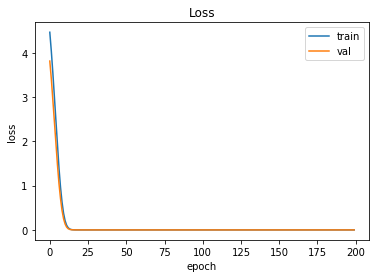

In [3]:
plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc=0)
plt.show()

In [4]:
shared_weights = model.get_layer('shared').get_weights()

print('shared_weights\n', shared_weights, '\n')

shared_weights
 [array([[1.9998027]], dtype=float32), array([0.99991053], dtype=float32)] 



공유 레이어를 사용하여 <br>
hA = sigmoid( a * xA + b ) <br>
hB = sigmoid( a * xB + b ) <br>
y = c * hA * hB + d <br>
관계를 만족시키는 데이터에서 a, b, c, d 를 발견해 봅시다. 초기 웨이트에 따라서 학습이 잘 안될 수도 있으므로 여러번 실행해 봅시다.

In [5]:
a = 2; b = 1; c = 2; d = 1

def sigmoid(x):
    return 1 / (1+np.exp(-x))

x_train_A = np.random.rand(1000,1) * 2 - 1
x_train_B = np.random.rand(1000,1) * 2 - 1
y_train = c * sigmoid(a * x_train_A + b) * sigmoid(a * x_train_B + b) + d

shared_layer = layers.Dense(1, activation='sigmoid', name='shared')

xA = layers.Input((1,), name='xA')
xB = layers.Input((1,), name='xB')
sA = shared_layer(xA)
sB = shared_layer(xB)
mul = layers.Multiply(name='mul')([sA, sB])
y = layers.Dense(1, name='y')(mul)

In [6]:
model = models.Model([xA, xB], y)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xA (InputLayer)                 [(None, 1)]          0                                            
__________________________________________________________________________________________________
xB (InputLayer)                 [(None, 1)]          0                                            
__________________________________________________________________________________________________
shared (Dense)                  (None, 1)            2           xA[0][0]                         
                                                                 xB[0][0]                         
__________________________________________________________________________________________________
mul (Multiply)                  (None, 1)            0           shared[0][0]               

In [7]:
model.compile('adam', 'mse')
hist = model.fit([x_train_A, x_train_B], y_train, batch_size=8, epochs=200, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/200
800/800 [==============================] - 0s 285us/sample - loss: 5.1177 - val_loss: 4.7595
Epoch 2/200
800/800 [==============================] - 0s 98us/sample - loss: 4.4963 - val_loss: 4.1844
Epoch 3/200
800/800 [==============================] - 0s 96us/sample - loss: 3.9558 - val_loss: 3.6824
Epoch 4/200
800/800 [==============================] - 0s 94us/sample - loss: 3.4847 - val_loss: 3.2483
Epoch 5/200
800/800 [==============================] - 0s 95us/sample - loss: 3.0740 - val_loss: 2.8649
Epoch 6/200
800/800 [==============================] - 0s 95us/sample - loss: 2.7135 - val_loss: 2.5309
Epoch 7/200
800/800 [==============================] - 0s 95us/sample - loss: 2.3963 - val_loss: 2.2347
Epoch 8/200
800/800 [==============================] - 0s 94us/sample - loss: 2.1163 - val_loss: 1.9717
Epoch 9/200
800/800 [==============================] - 0s 94us/sample - loss: 1.8683 - val_loss: 1.7397
Epoch 10/200
800/

800/800 [==============================] - 0s 99us/sample - loss: 0.0051 - val_loss: 0.0051
Epoch 79/200
800/800 [==============================] - 0s 94us/sample - loss: 0.0047 - val_loss: 0.0047
Epoch 80/200
800/800 [==============================] - 0s 94us/sample - loss: 0.0043 - val_loss: 0.0042
Epoch 81/200
800/800 [==============================] - 0s 95us/sample - loss: 0.0039 - val_loss: 0.0039
Epoch 82/200
800/800 [==============================] - 0s 95us/sample - loss: 0.0035 - val_loss: 0.0035
Epoch 83/200
800/800 [==============================] - 0s 95us/sample - loss: 0.0032 - val_loss: 0.0032
Epoch 84/200
800/800 [==============================] - 0s 94us/sample - loss: 0.0029 - val_loss: 0.0029
Epoch 85/200
800/800 [==============================] - 0s 96us/sample - loss: 0.0027 - val_loss: 0.0026
Epoch 86/200
800/800 [==============================] - 0s 93us/sample - loss: 0.0024 - val_loss: 0.0024
Epoch 87/200
800/800 [==============================] - 0s 94us/samp

800/800 [==============================] - 0s 93us/sample - loss: 3.9620e-07 - val_loss: 3.1233e-07
Epoch 152/200
800/800 [==============================] - 0s 92us/sample - loss: 2.7735e-07 - val_loss: 2.1593e-07
Epoch 153/200
800/800 [==============================] - 0s 90us/sample - loss: 2.0457e-07 - val_loss: 1.6923e-07
Epoch 154/200
800/800 [==============================] - 0s 95us/sample - loss: 1.3393e-07 - val_loss: 1.0464e-07
Epoch 155/200
800/800 [==============================] - 0s 93us/sample - loss: 9.0155e-08 - val_loss: 1.1667e-07
Epoch 156/200
800/800 [==============================] - 0s 93us/sample - loss: 6.4017e-08 - val_loss: 4.7180e-08
Epoch 157/200
800/800 [==============================] - 0s 90us/sample - loss: 4.1070e-08 - val_loss: 2.9717e-08
Epoch 158/200
800/800 [==============================] - 0s 94us/sample - loss: 2.4936e-08 - val_loss: 1.7912e-08
Epoch 159/200
800/800 [==============================] - 0s 94us/sample - loss: 1.5494e-08 - val_loss:

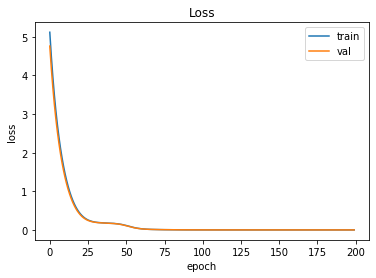

In [8]:
plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc=0)
plt.show()

In [9]:
shared_weights = model.get_layer('shared').get_weights()
y_weights = model.get_layer('y').get_weights()

print('shared_weights\n', shared_weights, '\n')
print('y_weights\n', y_weights)

shared_weights
 [array([[2.0000007]], dtype=float32), array([0.9999998], dtype=float32)] 

y_weights
 [array([[2.]], dtype=float32), array([1.0000001], dtype=float32)]
